In [1020]:
# 1 - Import necessary libraries
import pandas as pd
import os
import random as rd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

In [1021]:
print(os.name)
os.getcwd()

nt


'C:\\Users\\baris\\Desktop\\DATA 602\\Project\\Yahoo_fantasy_basketball_analyzer-master\\Yahoo_fantasy_basketball_analyzer-master\\yahoo_fantasy_basketball_analyzer\\machine_learning\\data\\2018\\player'

In [1022]:
files = os.listdir('C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player')
file_list = []
for element in files:
    if element.endswith(".csv"):
        file_list.append(element) 

len(file_list)

530

In [1062]:
# choose a random player to analyze
x = rd.randint(0,530)
file_list[x]


'Kyrie Irving.csv'

In [1063]:
path = "C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player"
df = pd.read_csv(path+"/"+str(file_list[x]), usecols=["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      67 non-null     object 
 1   FG%     67 non-null     float64
 2   FT%     54 non-null     float64
 3   TRB     67 non-null     int64  
 4   AST     67 non-null     int64  
 5   STL     67 non-null     int64  
 6   BLK     67 non-null     int64  
 7   TOV     67 non-null     int64  
 8   PTS     67 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.8+ KB


In [1064]:
# Putting zero(0) value for non-values
df = df.fillna(0)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      67 non-null     object 
 1   FG%     67 non-null     float64
 2   FT%     67 non-null     float64
 3   TRB     67 non-null     int64  
 4   AST     67 non-null     int64  
 5   STL     67 non-null     int64  
 6   BLK     67 non-null     int64  
 7   TOV     67 non-null     int64  
 8   PTS     67 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.8+ KB


**Explanation of the abbreviations:**
- MP = Minutes Played
- FG% = Field Goal Percentage 
- FT% = Free Throw Percentage 
- TRB = Total Rebound 
- AST = Assist 
- STL = Steal 
- BLK = Block 
- TOV = Turnover
- PTS = Points

In [1065]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,29:00,0.143,1.000,4,7,0,0,3,7
1,35:56,0.500,0.000,4,6,0,1,1,21
2,32:06,0.313,0.857,1,5,2,0,2,16
3,34:01,0.526,0.000,8,5,2,1,4,22
4,33:33,0.462,0.250,5,5,0,0,3,15


In [1066]:
df['MP'] = df['MP'].astype(str).str[0:2].str.replace(":","")
# df['MP'].str.split(":")[0][0]


In [1067]:
# getting only minutes and removing seconds from MP(minutes played) column
# df['MP'] = df['MP'].astype(str).str[0:2]
df['MP'] = df['MP'].apply(int)
df['MP']

0     29
1     35
2     32
3     34
4     33
      ..
62    35
63    32
64    32
65    27
66    35
Name: MP, Length: 67, dtype: int64

In [1068]:
# print(file_list[x])
df

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,29,0.143,1.000,4,7,0,0,3,7
1,35,0.500,0.000,4,6,0,1,1,21
2,32,0.313,0.857,1,5,2,0,2,16
3,34,0.526,0.000,8,5,2,1,4,22
4,33,0.462,0.250,5,5,0,0,3,15
...,...,...,...,...,...,...,...,...,...
62,35,0.500,1.000,2,5,3,0,1,30
63,32,0.368,1.000,8,3,2,0,6,25
64,32,0.421,0.800,1,4,1,0,2,23
65,27,0.500,1.000,3,6,0,0,0,17


In [1069]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,29,0.143,1.000,4,7,0,0,3,7
1,35,0.500,0.000,4,6,0,1,1,21
2,32,0.313,0.857,1,5,2,0,2,16
3,34,0.526,0.000,8,5,2,1,4,22
4,33,0.462,0.250,5,5,0,0,3,15


# Hypothesis 

H0: There is no difference in the accuracy or performance among the models selected

H1: There is a difference in the accuracy or performance among the models selected
- We set our confidence level as 95%. If the Z-score calculated from p-value is smaller than 1.96, we cannot deny H0. However, if it is greater than 1.95, we will deny H0 and accept H1.,

## Linear Regression Model 

Coefficients: 
 [[1.00071114]]
Mean squared error: 43.36
Coefficient of determination: 0.33


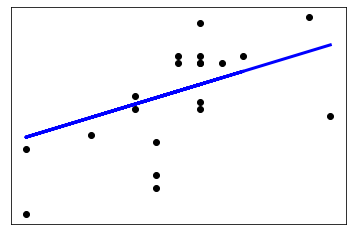

In [1070]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# defining features
df_X = df[["MP"]].to_numpy()

# target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

# Plot outputs 
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

For MP effect on PTS
Coefficients: 
 [[1.00071114]]
Mean squared error: 43.36
Coefficient of determination: 0.33


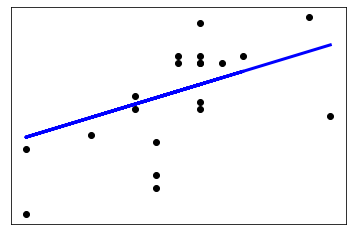

For FG% effect on PTS
Coefficients: 
 [[30.40860896]]
Mean squared error: 51.56
Coefficient of determination: 0.20


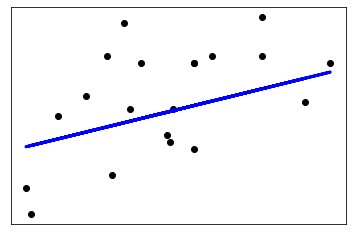

For PTS effect on PTS
Coefficients: 
 [[1.]]
Mean squared error: 0.00
Coefficient of determination: 1.00


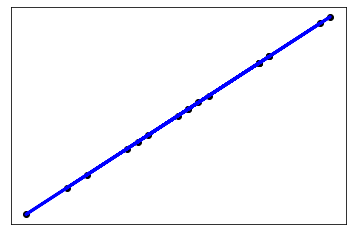

For FT% effect on PTS
Coefficients: 
 [[7.33044094]]
Mean squared error: 47.88
Coefficient of determination: 0.26


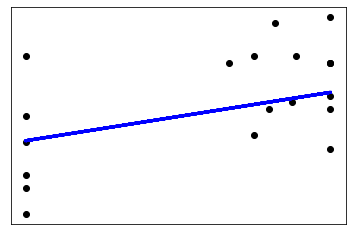

For TRB effect on PTS
Coefficients: 
 [[0.51889419]]
Mean squared error: 56.27
Coefficient of determination: 0.13


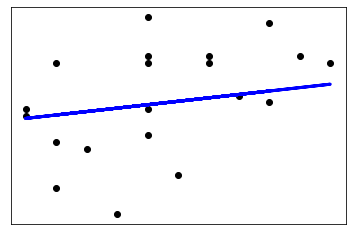

For AST effect on PTS
Coefficients: 
 [[0.74725806]]
Mean squared error: 81.91
Coefficient of determination: -0.26


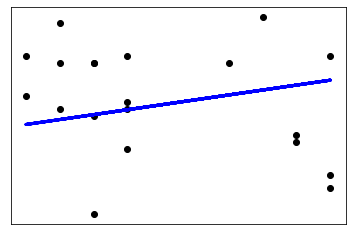

For STL effect on PTS
Coefficients: 
 [[0.99932908]]
Mean squared error: 65.24
Coefficient of determination: -0.01


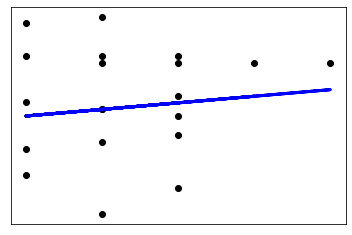

For BLK effect on PTS
Coefficients: 
 [[3.3734375]]
Mean squared error: 55.41
Coefficient of determination: 0.15


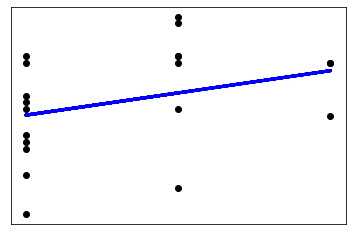

For TOV effect on PTS
Coefficients: 
 [[1.64920071]]
Mean squared error: 62.98
Coefficient of determination: 0.03


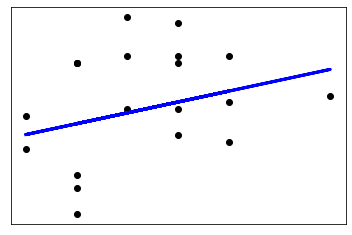

In [1071]:
# Checking all features one by one with FOR loop 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

features = ["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]

for element in features: 
    print("For", element, "effect on PTS")
    # # defining features
    df_X = df[[element]].to_numpy()

    # # target variable
    df_y = df[['PTS']].to_numpy()

    # Split the data into training/testing sets
    df_X_train = df_X[:-20]
    df_X_test = df_X[-20:]

    # Split the targets into training/testing sets
    df_y_train = df_y[:-20]
    df_y_test = df_y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(df_X_train, df_y_train)

    # Make predictions using the testing set
    df_y_pred = regr.predict(df_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)

    # The mean squared error
    print('Mean squared error: %.2f'
         % mean_squared_error(df_y_test, df_y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
         % r2_score(df_y_test, df_y_pred))

    # Plot outputs 
    plt.scatter(df_X_test, df_y_test, color='black')
    plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [1072]:
# Adding more features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "AST", "TRB"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

df

Coefficients: 
 [[ 1.07693754 30.27293633 -0.19564291 -0.18045064]]
Mean squared error: 28.44
Coefficient of determination: 0.56


,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,29,0.143,1.000,4,7,0,0,3,7
1,35,0.500,0.000,4,6,0,1,1,21
2,32,0.313,0.857,1,5,2,0,2,16
3,34,0.526,0.000,8,5,2,1,4,22
4,33,0.462,0.250,5,5,0,0,3,15
...,...,...,...,...,...,...,...,...,...
62,35,0.500,1.000,2,5,3,0,1,30
63,32,0.368,1.000,8,3,2,0,6,25
64,32,0.421,0.800,1,4,1,0,2,23
65,27,0.500,1.000,3,6,0,0,0,17


In [1073]:
# Adding all the features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[ 1.06634982 29.75979997  5.34711247 -0.12945041 -0.32582023  0.59169852
  -0.55651528  0.06197723]]
Mean squared error: 19.61
Coefficient of determination: 0.70


In [1074]:
# Calculating R-squared score, mean absolute error, and mean squared error for linear regression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rms = mean_squared_error(df_y_test, df_y_pred, squared=False)

print("For LINEAR REGRESSION MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, df_y_pred), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, df_y_pred), '\n',
      "R-squared score is:", r2_score(df_y_test, df_y_pred), '\n', 
      "Root mean squared error", rms)


For LINEAR REGRESSION MODEL 
Mean absolute error is: 3.348095664477796 
 Mean squared error is: 19.610656346184864 
 R-squared score is: 0.6975531100218251 
 Root mean squared error 4.428392072319801


In [1098]:
# putting the accuracy coefficients in a list to test hypothesis later 

linear = [r2_score(df_y_test, df_y_pred), mean_absolute_error(df_y_test, df_y_pred),
         mean_squared_error(df_y_test, df_y_pred), rms]

In [1099]:
linear

[0.6975531100218251, 3.348095664477796, 19.610656346184864, 2.00615677353491]

Prediction: [24.6911781] vs. Actual: [22]
Prediction: [34.35375918] vs. Actual: [37]
Prediction: [8.97516526] vs. Actual: [7]
Prediction: [25.48789516] vs. Actual: [31]
Prediction: [15.21790323] vs. Actual: [13]
Prediction: [30.80514093] vs. Actual: [24]
Prediction: [19.78571687] vs. Actual: [19]
Prediction: [31.7988898] vs. Actual: [30]
Prediction: [18.95210111] vs. Actual: [18]
Prediction: [23.60792574] vs. Actual: [31]
Prediction: [23.82593796] vs. Actual: [30]
Prediction: [29.35194921] vs. Actual: [30]
Prediction: [23.92682787] vs. Actual: [36]
Prediction: [27.05810548] vs. Actual: [31]
Prediction: [13.20804783] vs. Actual: [11]
Prediction: [30.24733415] vs. Actual: [30]
Prediction: [22.71311674] vs. Actual: [25]
Prediction: [22.96168883] vs. Actual: [23]
Prediction: [19.42419215] vs. Actual: [17]
Prediction: [27.14345004] vs. Actual: [23]


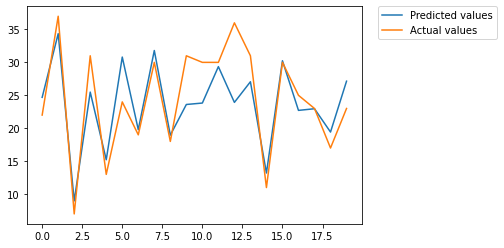

In [1075]:
# Printing predicted and actual values

for i in range(len(df_y_test)):
    print("Prediction:", df_y_pred[i], "vs. Actual:", df_y_test[i])

plt.plot(df_y_pred, label="Predicted values")
plt.plot(df_y_test, label="Actual values")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Statsmodel for Linear Regression

In [1076]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [1077]:
mod = sm.OLS(df_y, df_X) #describe model
res = mod.fit() #fit model
print(res.summary()) #summarize model

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              152.1
Date:                Sat, 01 May 2021   Prob (F-statistic):                    1.90e-36
Time:                        15:56:47   Log-Likelihood:                         -208.37
No. Observations:                  67   AIC:                                      432.7
Df Residuals:                      59   BIC:                                      450.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1078]:
res.params

array([ 0.42778793, 13.45197032,  4.78092611,  0.038086  , -0.36970692,
        0.37647544,  2.00272944,  0.47058268])

In [1079]:
print("R-squared:", res.rsquared)

R-squared: 0.9537478750861044


## Lasso Model

In [1081]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# summarize shape
print(df.shape)
# summarize first few lines
print(df.head())

(67, 9)
   MP    FG%    FT%  TRB  AST  STL  BLK  TOV  PTS
0  29  0.143  1.000    4    7    0    0    3    7
1  35  0.500  0.000    4    6    0    1    1   21
2  32  0.313  0.857    1    5    2    0    2   16
3  34  0.526  0.000    8    5    2    1    4   22
4  33  0.462  0.250    5    5    0    0    3   15


In [1082]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 5.239 (1.762)


In [1083]:
df.tail(10)

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
57,35,0.500,0.667,11,9,1,2,3,30
58,36,0.435,1.000,5,4,4,1,1,30
59,35,0.414,0.818,9,4,0,1,3,36
60,34,0.522,0.750,7,6,2,0,3,31
61,33,0.294,0.000,2,12,2,1,1,11
62,35,0.500,1.000,2,5,3,0,1,30
63,32,0.368,1.000,8,3,2,0,6,25
64,32,0.421,0.800,1,4,1,0,2,23
65,27,0.500,1.000,3,6,0,0,0,17
66,35,0.474,1.000,5,6,1,1,3,23


In [1084]:
df_y_test

array([[22],
       [37],
       [ 7],
       [31],
       [13],
       [24],
       [19],
       [30],
       [18],
       [31],
       [30],
       [30],
       [36],
       [31],
       [11],
       [30],
       [25],
       [23],
       [17],
       [23]], dtype=int64)

In [1085]:
#define model 
model = Lasso(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
yhat = model.predict(df_X_test)
yhat

array([31.87013145, 31.15765147, 17.58666169, 26.62196152, 22.41719457,
       27.03686108, 20.58077449, 25.98336417, 22.89270206, 27.7817356 ,
       26.27664013, 28.30287949, 27.25196078, 25.80646155, 22.37672398,
       26.85906608, 25.00732835, 23.70581487, 18.08650102, 26.91322283])

Prediction: 31.870131446043654 vs. Actual: [22]
Prediction: 31.15765146839823 vs. Actual: [37]
Prediction: 17.586661686425295 vs. Actual: [7]
Prediction: 26.621961520013524 vs. Actual: [31]
Prediction: 22.417194574601037 vs. Actual: [13]
Prediction: 27.036861079002374 vs. Actual: [24]
Prediction: 20.580774492034912 vs. Actual: [19]
Prediction: 25.983364172567885 vs. Actual: [30]
Prediction: 22.89270205858573 vs. Actual: [18]
Prediction: 27.781735595602324 vs. Actual: [31]
Prediction: 26.276640126852737 vs. Actual: [30]
Prediction: 28.302879492258274 vs. Actual: [30]
Prediction: 27.251960779167188 vs. Actual: [36]
Prediction: 25.806461547807597 vs. Actual: [31]
Prediction: 22.37672398092955 vs. Actual: [11]
Prediction: 26.85906608349511 vs. Actual: [30]
Prediction: 25.007328346944835 vs. Actual: [25]
Prediction: 23.70581486897917 vs. Actual: [23]
Prediction: 18.086501023510138 vs. Actual: [17]
Prediction: 26.913222827510257 vs. Actual: [23]


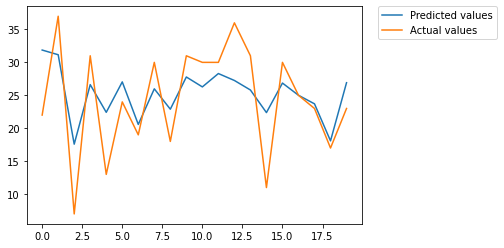

In [1086]:
for i in range(len(df_y_test)):
    print("Prediction:", yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(yhat, label="Predicted values")
plt.plot(df_y_test, label="Actual values")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [1111]:
lasso_rms = mean_squared_error(df_y_test, yhat, squared=False)

print("For LASSO REGRESSION MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, yhat), '\n', 
      "Root mean squared error", lasso_rms)

For LASSO REGRESSION MODEL 
Mean absolute error is: 4.821609779920204 
 Mean squared error is: 34.50816029524346 
 R-squared score is: 0.4677951836020441 
 Root mean squared error 5.874364671625644


In [1112]:
# putting the accuracy coefficients in a list to test hypothesis later 

lasso = [r2_score(df_y_test, yhat), mean_absolute_error(df_y_test, yhat),
         mean_squared_error(df_y_test, yhat), lasso_rms]

lasso

[0.4677951836020441, 4.821609779920204, 34.50816029524346, 5.874364671625644]

## Ridge Regression Model

In [1088]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 4.062 (1.294)


In [1089]:
data = df.values
X, y = data[:, :-1], data[:, -1]
#define model 
model = Ridge(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
ridge_yhat = model.predict(df_X_test)
ridge_yhat

array([27.02066798, 33.46371398, 10.76016641, 25.17582406, 15.47413314,
       29.70534379, 19.60762565, 31.58966804, 17.75722833, 26.84028009,
       27.34981879, 30.60576095, 27.43946858, 26.67432235, 15.1801921 ,
       28.5049261 , 26.0856258 , 22.73196786, 18.31268415, 28.58948853])

Prediction: 27.020667984922593 vs. Actual: [22]
Prediction: 33.46371397655032 vs. Actual: [37]
Prediction: 10.76016641090473 vs. Actual: [7]
Prediction: 25.17582406184196 vs. Actual: [31]
Prediction: 15.47413313779666 vs. Actual: [13]
Prediction: 29.705343794734883 vs. Actual: [24]
Prediction: 19.607625652770867 vs. Actual: [19]
Prediction: 31.589668043777618 vs. Actual: [30]
Prediction: 17.75722833464739 vs. Actual: [18]
Prediction: 26.840280093901665 vs. Actual: [31]
Prediction: 27.349818789280622 vs. Actual: [30]
Prediction: 30.605760949408886 vs. Actual: [30]
Prediction: 27.4394685796078 vs. Actual: [36]
Prediction: 26.674322348433005 vs. Actual: [31]
Prediction: 15.180192099862783 vs. Actual: [11]
Prediction: 28.504926095667795 vs. Actual: [30]
Prediction: 26.08562579979284 vs. Actual: [25]
Prediction: 22.731967861089462 vs. Actual: [23]
Prediction: 18.31268414905264 vs. Actual: [17]
Prediction: 28.58948853451572 vs. Actual: [23]


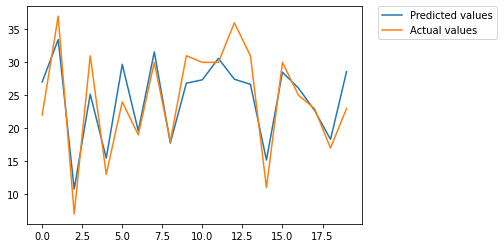

In [1090]:
for i in range(len(df_y_test)):
    print("Prediction:", ridge_yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(ridge_yhat, label="Predicted values")
plt.plot(df_y_test, label="Actual values")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [1105]:
ridge_rms = mean_squared_error(df_y_test, ridge_yhat, squared=False)

print("For RIDGE REGRESSION MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, ridge_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, ridge_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, ridge_yhat), '\n', 
      "Root mean squared error", ridge_rms)

For RIDGE REGRESSION MODEL 
Mean absolute error is: 3.14969032082601 
 Mean squared error is: 14.900641845160578 
 R-squared score is: 0.7701936791307745 
 Root mean squared error 3.8601349516772827


In [1107]:
# putting the accuracy coefficients in a list to test hypothesis later 

ridge = [r2_score(df_y_test, ridge_yhat), mean_absolute_error(df_y_test, ridge_yhat),
         mean_squared_error(df_y_test, ridge_yhat), ridge_rms]

ridge

[0.7701936791307745, 3.14969032082601, 14.900641845160578, 3.8601349516772827]

## Random Forest Model

In [1092]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.1


- The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [1093]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

data = df.values
X, y = data[:, :-1], data[:, -1]
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 4.425 (1.272)


In [1094]:
# Making predictions
# fit the model on the whole dataset
model.fit(X, y)

# putting new row from test dataset
random_yhat = model.predict(df_X_test)
random_yhat

array([23.94, 36.53, 10.37, 28.68, 14.87, 26.76, 20.21, 29.82, 18.23,
       27.5 , 29.34, 29.62, 31.87, 29.21, 12.99, 27.81, 23.72, 22.28,
       17.46, 24.7 ])

Prediction: 23.94 vs. Actual: [22]
Prediction: 36.53 vs. Actual: [37]
Prediction: 10.37 vs. Actual: [7]
Prediction: 28.68 vs. Actual: [31]
Prediction: 14.87 vs. Actual: [13]
Prediction: 26.76 vs. Actual: [24]
Prediction: 20.21 vs. Actual: [19]
Prediction: 29.82 vs. Actual: [30]
Prediction: 18.23 vs. Actual: [18]
Prediction: 27.5 vs. Actual: [31]
Prediction: 29.34 vs. Actual: [30]
Prediction: 29.62 vs. Actual: [30]
Prediction: 31.87 vs. Actual: [36]
Prediction: 29.21 vs. Actual: [31]
Prediction: 12.99 vs. Actual: [11]
Prediction: 27.81 vs. Actual: [30]
Prediction: 23.72 vs. Actual: [25]
Prediction: 22.28 vs. Actual: [23]
Prediction: 17.46 vs. Actual: [17]
Prediction: 24.7 vs. Actual: [23]


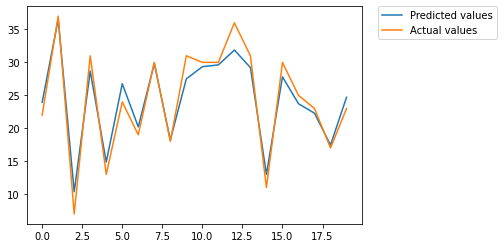

In [1095]:
for i in range(len(df_y_test)):
    print("Prediction:", random_yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(random_yhat, label="Predicted values")
plt.plot(df_y_test, label="Actual values")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


In [1109]:
random_rms = mean_squared_error(df_y_test, random_yhat, squared=False)

print("For RANDOM FOREST MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, random_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, random_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, random_yhat), '\n', 
      "Root mean squared error", random_rms)


For RANDOM FOREST MODEL 
Mean absolute error is: 1.6575000000000002 
 Mean squared error is: 4.024665000000001 
 R-squared score is: 0.9379292874768661 
 Root mean squared error 2.00615677353491


In [1110]:
# putting the accuracy coefficients in a list to test hypothesis later 

random_forest = [r2_score(df_y_test, random_yhat), mean_absolute_error(df_y_test, random_yhat),
         mean_squared_error(df_y_test, random_yhat), random_rms]

random_forest

[0.9379292874768661, 1.6575000000000002, 4.024665000000001, 2.00615677353491]

### Kruskal Wallis Test for Hypothesis

In [1113]:
# We are going to compare accuracy coefficients for different models and see if it supports our hypothesis from it's p-value

from scipy import stats

stats.kruskal(linear, lasso, ridge, random_forest)

KruskalResult(statistic=1.3641384388807116, pvalue=0.7139619833664506)

## Conclusion for Hypothesis

Our p-value is 0.71. It is a lot higher than our significance level (0.05), so we will have to reject the null hypothesis (H0) and accept H1. There is a difference in the accuracy of performance among the selected models. 